In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [43]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

# 画箱形图探索数据

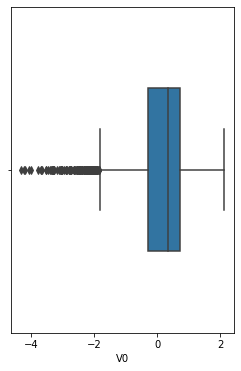

In [44]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(train_data['V0'],orient="h", width=0.5)

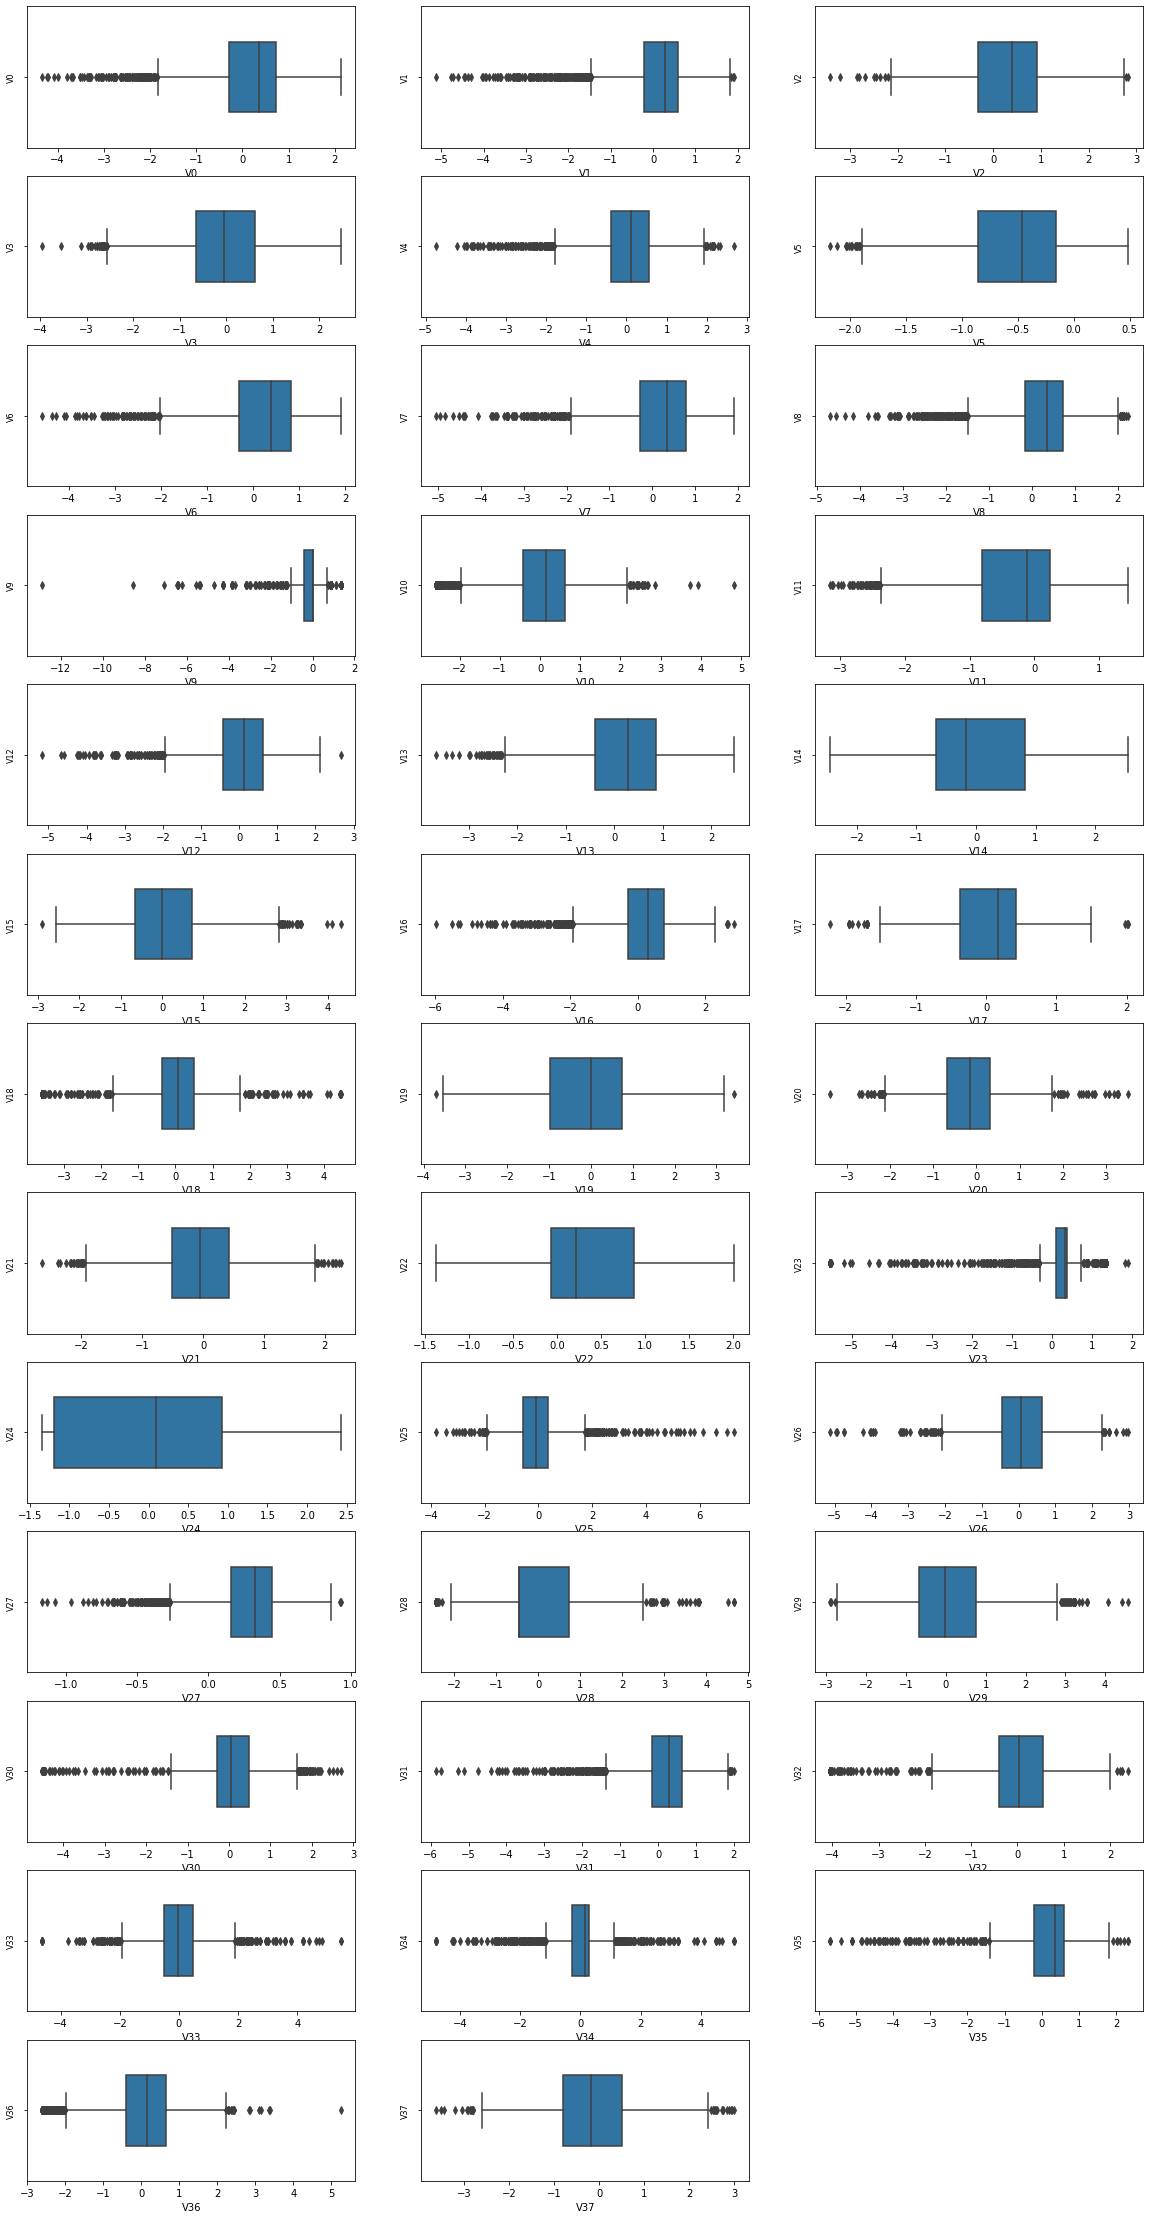

In [45]:
# 画箱式图
column = train_data.columns.tolist()[:39]  # 列表头
fig = plt.figure(figsize=(20, 40))  # 指定绘图对象宽度和高度
for i in range(38):
    plt.subplot(13, 3, i + 1)  # 13行3列子图
    sns.boxplot(train_data[column[i]], orient="h", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.show()

# 查看数据分布图

查看特征变量‘V0’的数据分布直方图，并绘制Q-Q图查看数据是否近似于正态分布

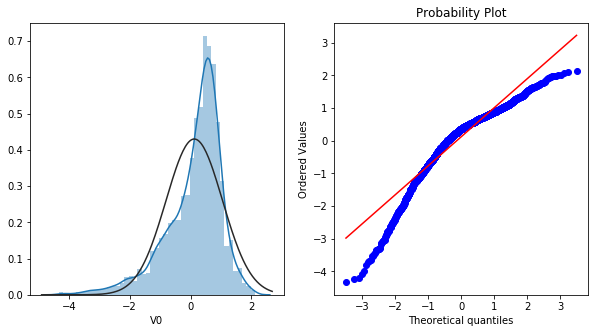

In [46]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(train_data['V0'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], plot=plt)

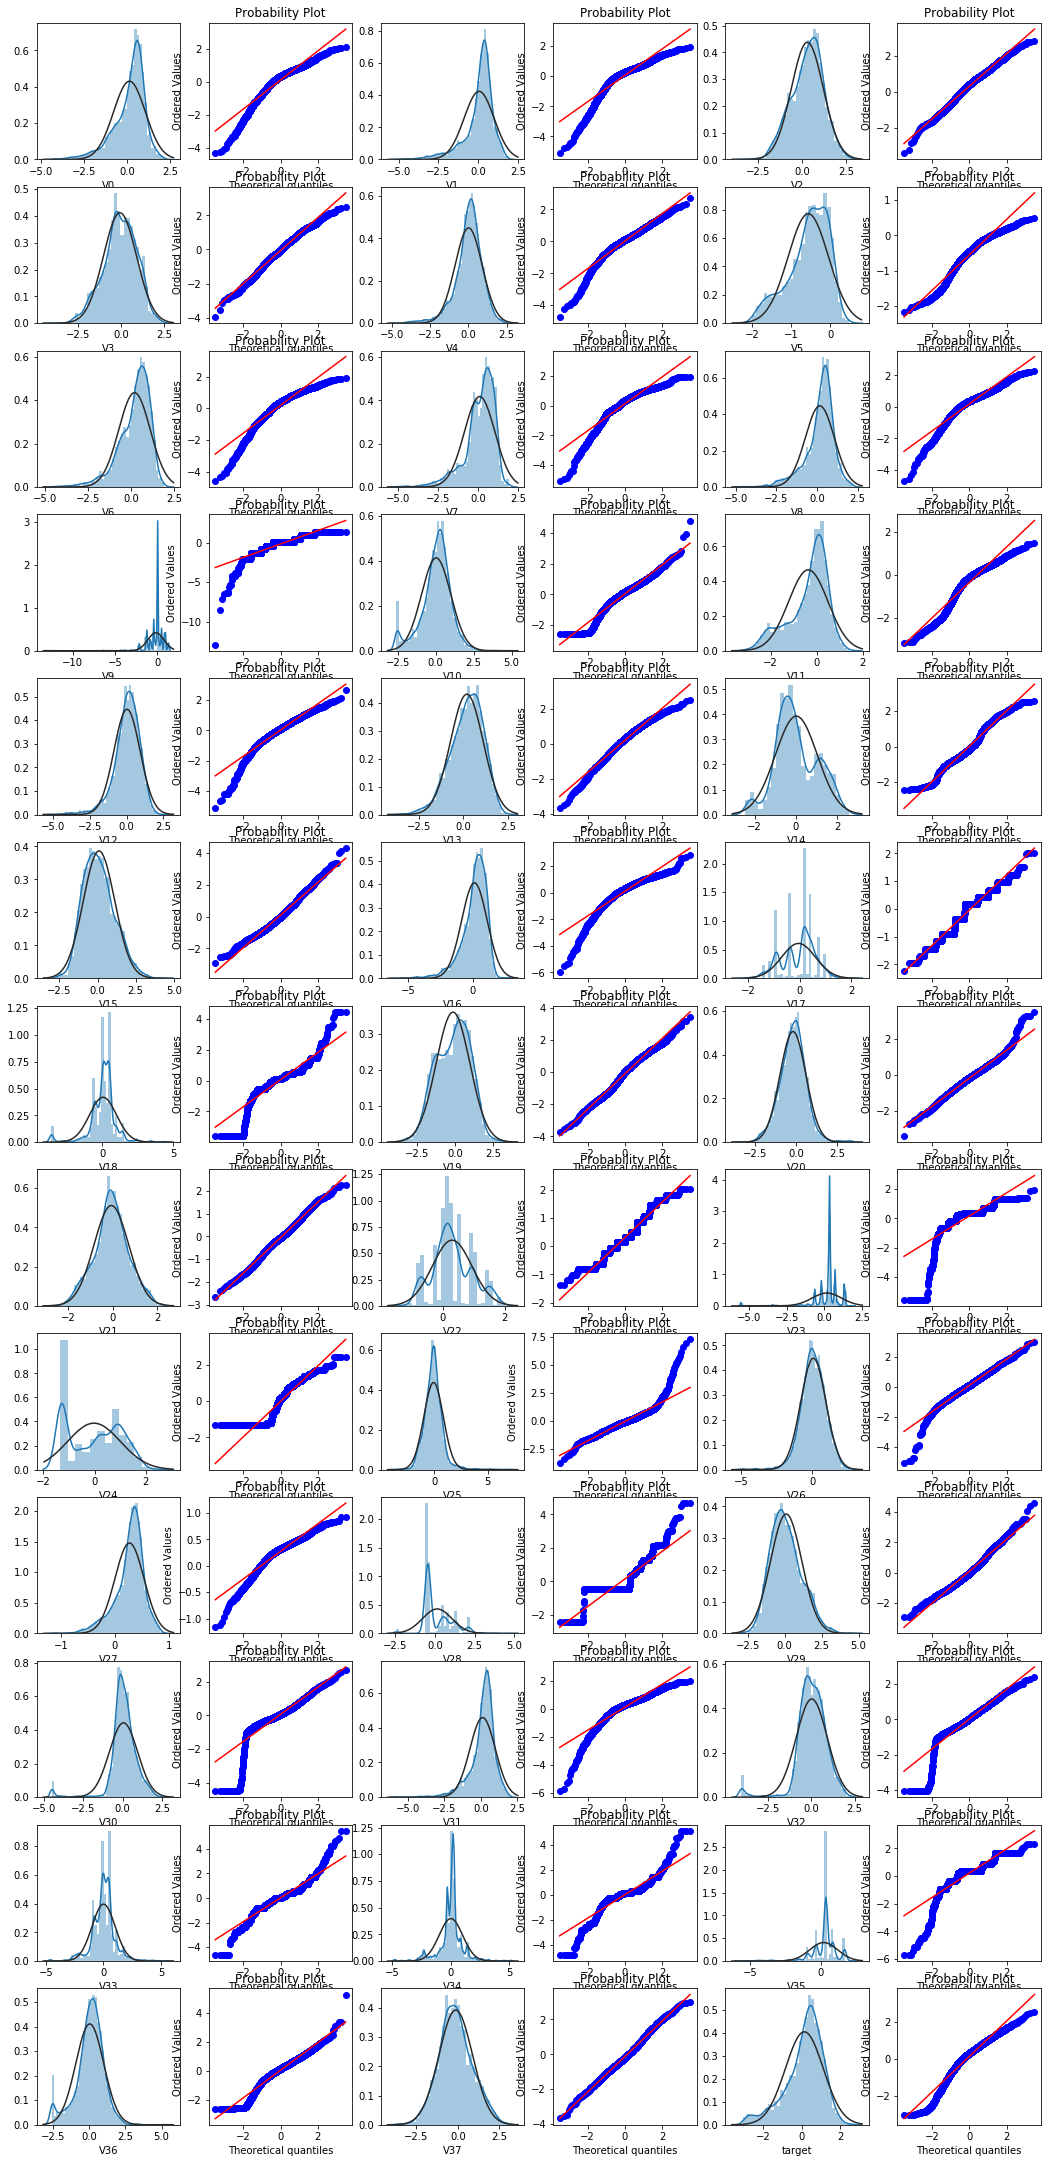

In [47]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(3*train_cols,3*train_rows))

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.show()

由上面的数据分布图信息可以看出，很多特征变量（如'V1','V9','V24','V28'等）的数据分布不是正态的，数据并不跟随对角线，后续可以使用数据变换对数据进行转换。

对比同一特征变量‘V0’下，训练集数据和测试集数据的分布情况，查看数据分布是否一致


对比同一特征变量‘V0’下，训练集数据和测试集数据的分布情况，查看数据分布是否一致

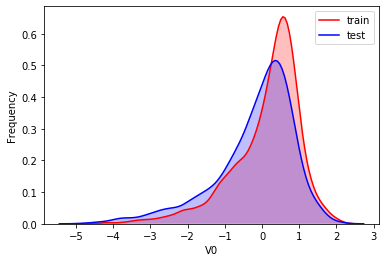

In [48]:
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

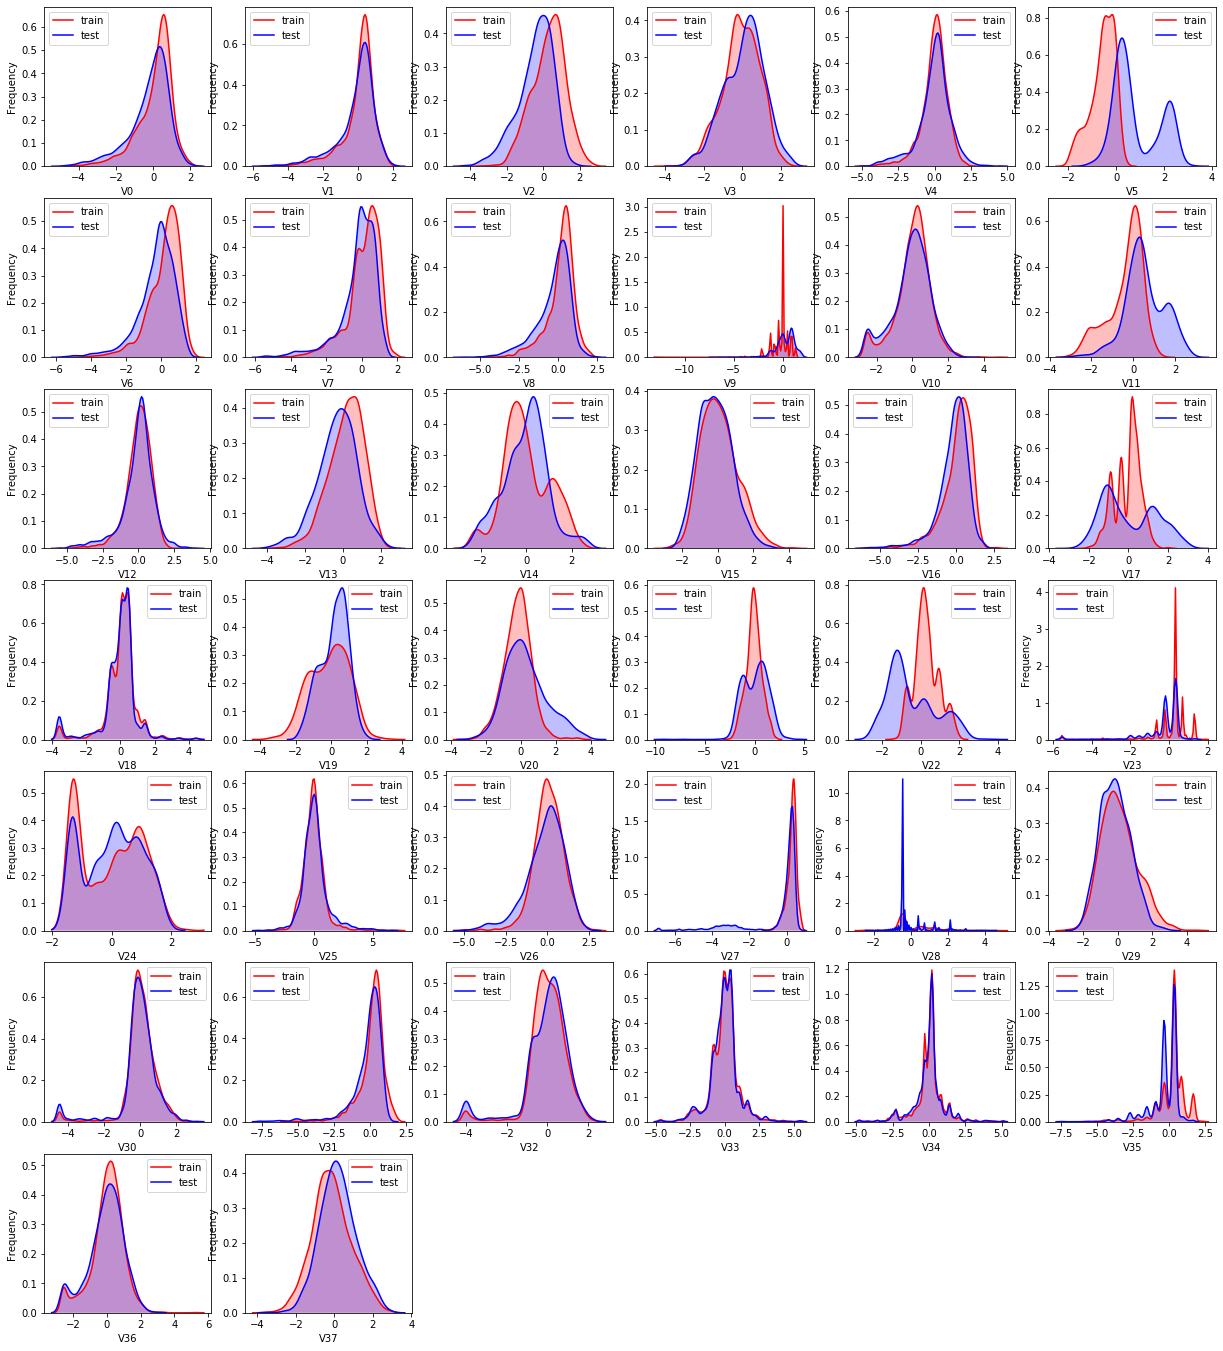

In [49]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(3.5*dist_cols, 3.5*dist_rows))

i=1
for col in test_data.columns:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

查看特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布

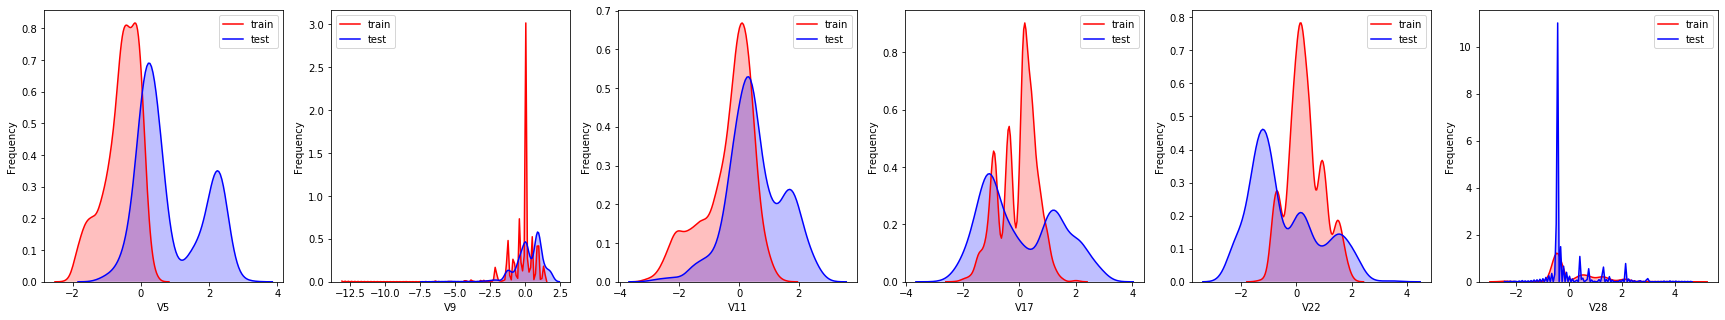

In [50]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col,5*drop_row))

i=1
for col in ["V5","V9","V11","V17","V22","V28"]:
    ax =plt.subplot(drop_row,drop_col,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

由上图的数据分布可以看到特征'V5','V9','V11','V17','V22','V28' 训练集数据与测试集数据分布不一致，会导致模型泛化能力差，采用删除此类特征方法。

In [51]:
drop_columns = ['V5','V9','V11','V17','V22','V28']

# 可视化线性回归关系

查看特征变量‘V0’与'target'变量的线性回归关系

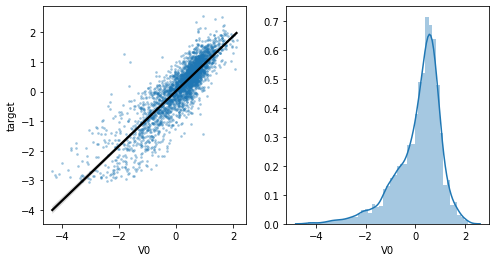

In [52]:
fcols = 2
frows = 1

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('V0')
plt.ylabel('target')

ax=plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

查看所有特征变量与'target'变量的线性回归关系

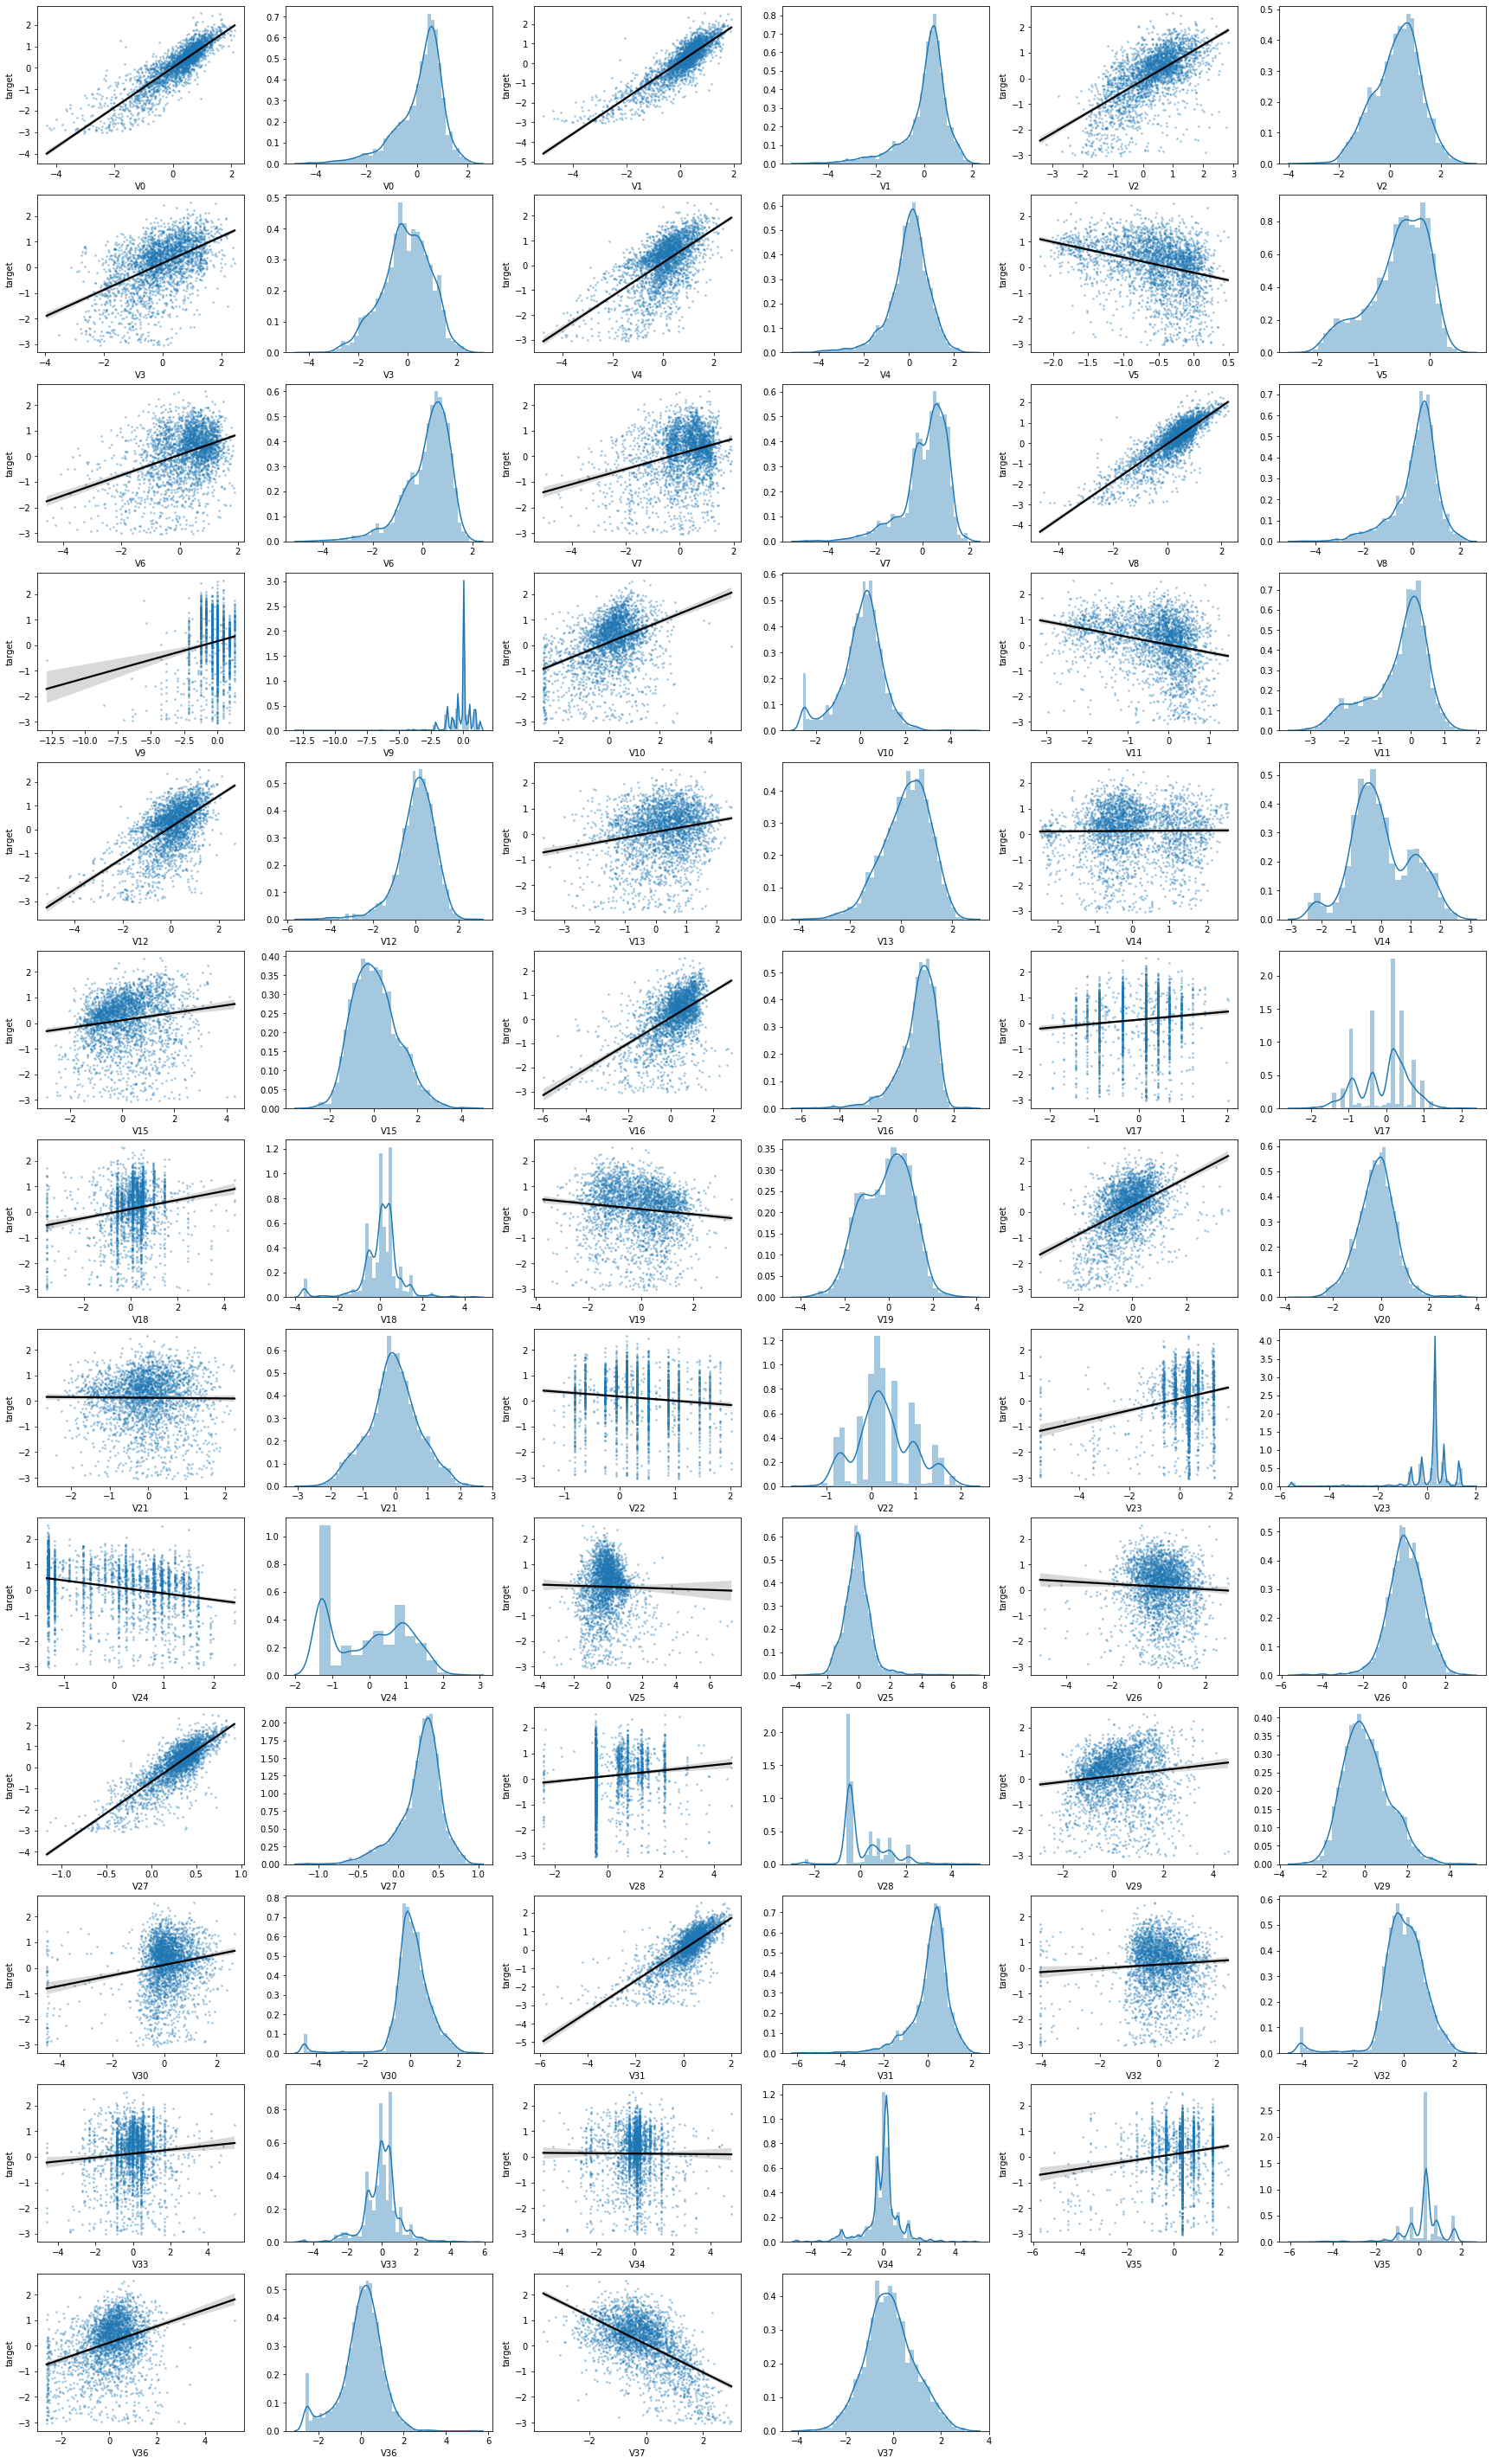

In [53]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

# 查看特征变量的相关性

In [54]:
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4        V6        V7  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  0.189267  0.141294   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  0.276805  0.205023   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  0.615938  0.477114   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  0.233896  0.197836   
V4      0.781212  0.657790  0.057697  0.315046  1.000000 -0.117529 -0.052370   
V6      0.189267  0.276805  0.615938  0.233896 -0.117529  1.000000  0.917502   
V7      0.141294  0.205023  0.477114  0.197836 -0.052370  0.917502  1.000000   
V8      0.794013  0.874650  0.703431  0.411946  0.449542  0.468233  0.389987   
V10     0.298443  0.310120  0.346006  0.321262  0.141129  0.415660  0.310982   
V12     0.751830  0.656186  0.059941  0.306397  0.927685 -0.087312 -0.036791   
V13     0.185144  0.157518  0.204762 -0.003636  0.075993  0.138367  0.110973   
V14    -0.004144 -0.006268 -0.106282 -0.232677  0.023853  0.072911  0.163931   
V15     0.314520  0.164702 -0.224573  0.143457  0.615704 -0.431542 -0.291272   
V16     0.347357  0.435606  0.782474  0.394517  0.023818  0.847119  0.752683   
V18     0.148622  0.123862  0.132105  0.022868  0.136022  0.110570  0.098691   
V19    -0.100294 -0.092673 -0.161802 -0.246008 -0.205729  0.215290  0.158371   
V20     0.462493  0.459795  0.298385  0.289594  0.291309  0.136091  0.089399   
V21    -0.029285 -0.012911 -0.030932  0.114373  0.174025 -0.051806 -0.065300   
V23     0.231136  0.222574  0.065509  0.081374  0.196530  0.069901  0.125180   
V24    -0.324959 -0.233556  0.010225 -0.237326 -0.529866  0.072418 -0.030292   
V25    -0.200706 -0.070627  0.481785 -0.100569 -0.444375  0.438610  0.316744   
V26    -0.125140 -0.043012  0.035370 -0.027685 -0.080487  0.106055  0.160566   
V27     0.733198  0.824198  0.726250  0.392006  0.412083  0.474441  0.424185   
V29     0.302145  0.147096 -0.275764  0.117610  0.659093 -0.467980 -0.311363   
V30     0.156968  0.175997  0.175943  0.043966  0.022807  0.188907  0.170113   
V31     0.675003  0.769745  0.653764  0.421954  0.447016  0.546535  0.475254   
V32     0.050951  0.085604  0.033942 -0.092423 -0.026186  0.144550  0.122707   
V33     0.056439  0.035129  0.050309 -0.007159  0.062367  0.054210  0.034508   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659 -0.002914 -0.019103   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  0.044992  0.111166   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  0.433804  0.340479   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054 -0.404817 -0.292285   
target  0.873212  0.871846  0.638878  0.512074  0.603984  0.370037  0.287815   

              V8       V10       V12  ...       V29       V30       V31  \
V0      0.794013  0.298443  0.751830  ...  0.302145  0.156968  0.675003   
V1      0.874650  0.310120  0.656186  ...  0.147096  0.175997  0.769745   
V2      0.703431  0.346006  0.059941  ... -0.275764  0.175943  0.653764   
V3      0.411946  0.321262  0.306397  ...  0.117610  0.043966  0.421954   
V4      0.449542  0.141129  0.927685  ...  0.659093  0.022807  0.447016   
V6      0.468233  0.415660 -0.087312  ... -0.467980  0.188907  0.546535   
V7      0.389987  0.310982 -0.036791  ... -0.311363  0.170113  0.475254   
V8      1.000000  0.419703  0.420557  ... -0.011091  0.150258  0.878072   
V10     0.419703  1.000000  0.140462  ... -0.105042 -0.036705  0.560213   
V12     0.420557  0.140462  1.000000  ...  0.666775  0.028866  0.441963   
V13     0.153299 -0.059553  0.098771  ...  0.008235  0.027328  0.113743   
V14     0.008138 -0.077543  0.020069  ...  0.056814 -0.004057  0.010989   
V15     0.018366 -0.046737  0.642081  ...  0.951314 -0.111311  0.011768   
V16     0.680031  0.546975  0.025736  ... -0.342210  0.154794  0.778538   
V18     0.093682 -0.024693  0.119833  ...  0.053958  0.470341  0.079718   
V19    -0.144693  0.074903 -0.148319  ... -0.205409  0.100133 -0.131542   
V20     0.412868  

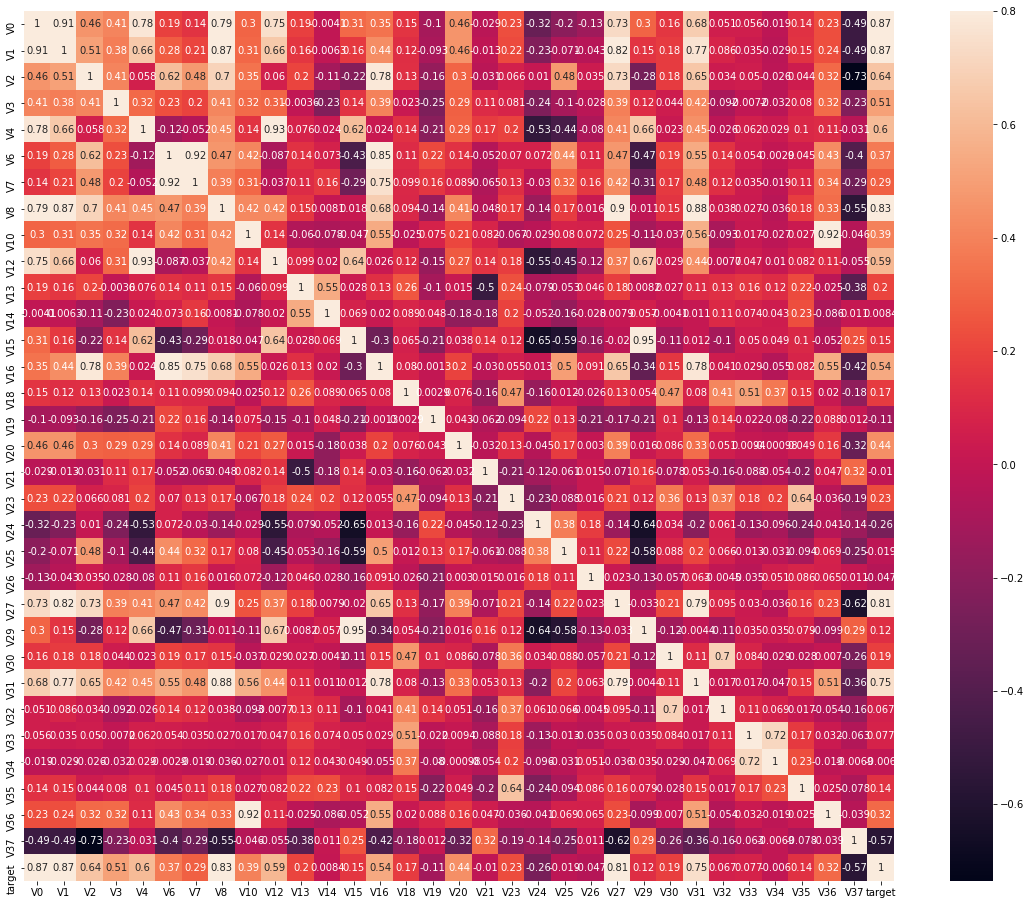

In [55]:
# 画出相关性热力图
ax = plt.subplots(figsize=(20, 16))#调整画布大小

ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数

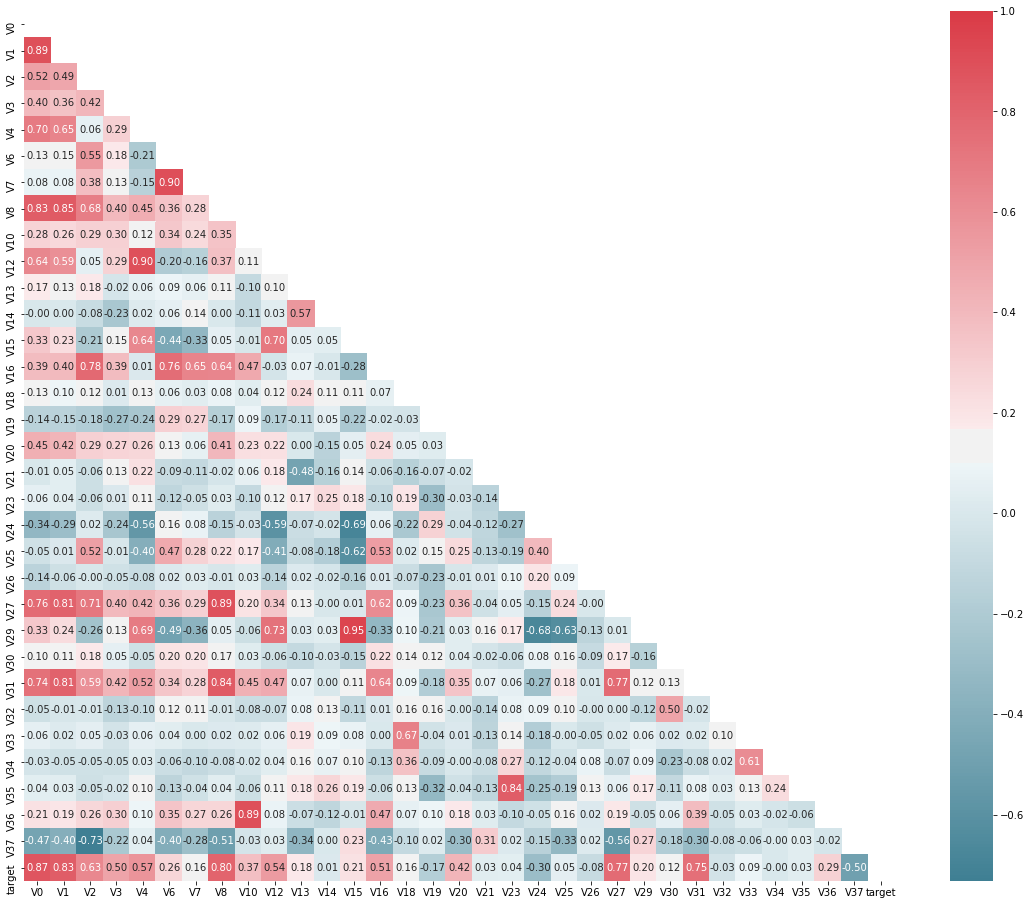

In [56]:
# 找出相关程度
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)

plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

上图为所有特征变量和target变量两两之间的相关系数，由此可以看出各个特征变量V0-V37之间的相关性以及特征变量V0-V37与target的相关性。

# 查找出特征变量和target变量相关系数大于0.5的特征变量

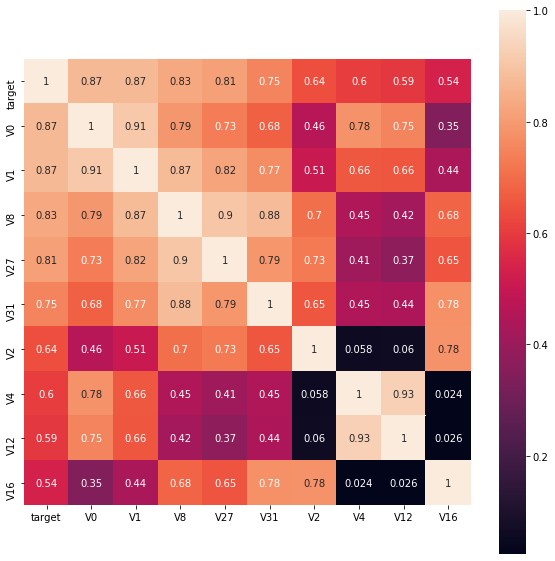

In [57]:
#寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))#调整画布大小
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True)
#g = sns.heatmap(train_data[cols].corr(),annot=True,square=True,cmap="RdYlGn")
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)

plt.show()

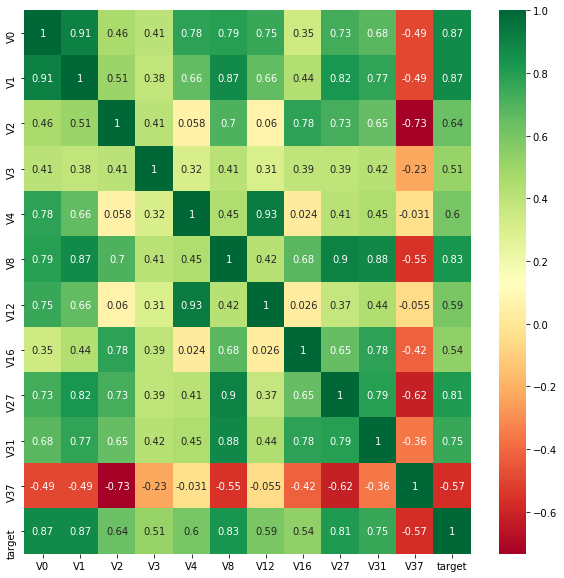

In [58]:
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [59]:
drop_columns.clear()
drop_columns = ['V5','V9','V11','V17','V22','V28']

In [60]:
# Threshold for removing correlated variables
threshold = 0.5

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
#data_all.drop(drop_col, axis=1, inplace=True)

由于'V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'特征的相关系数值小于0.5，故认为这些特征与最终的预测target值不相关，删除这些特征变量；

In [62]:
#merge train_set and test_set
train_x =  train_data.drop(['target'], axis=1)

#data_all=pd.concat([train_data,test_data],axis=0,ignore_index=True)
data_all = pd.concat([train_x,test_data]) 


data_all.drop(drop_columns,axis=1,inplace=True)
#View data
data_all.head()

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -1.812 -2.360 -0.436 -0.940 -0.073  ...   
1  0.968  0.437  0.066  0.566  0.194 -1.566 -2.360  0.332  0.188 -0.134  ...   
2  1.013  0.568  0.235  0.370  0.112 -1.367 -2.360  0.396  0.874 -0.072  ...   
3  0.733  0.368  0.283  0.165  0.599 -1.200 -2.086  0.403  0.011 -0.014  ...   
4  0.684  0.638  0.260  0.209  0.337 -1.073 -2.086  0.314 -0.251  0.199  ...   

     V27    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0  0.168  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508  
1  0.338 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730  
2  0.326 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589  
3  0.277  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112  
4  0.332  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028  

[5 rows x 32 columns]

In [63]:
# normalise numeric columns
cols_numeric=list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V27          V29          V30          V31          V32  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.881401     0.388683     0.589459     0.792709     0.628824   
std       0.128221     0.133475     0.130786     0.102976     0.155003   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.888575     0.292445     0.550092     0.761816     0.562461   
50%       0.916015     0.375734     0.594428     0.815055     0.643056   
75%       0.932555     0.471837     0.650798     0.852229     0.719777   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

In [64]:
#col_data_process = cols_numeric.append('target')
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax,axis=0)

In [65]:
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]

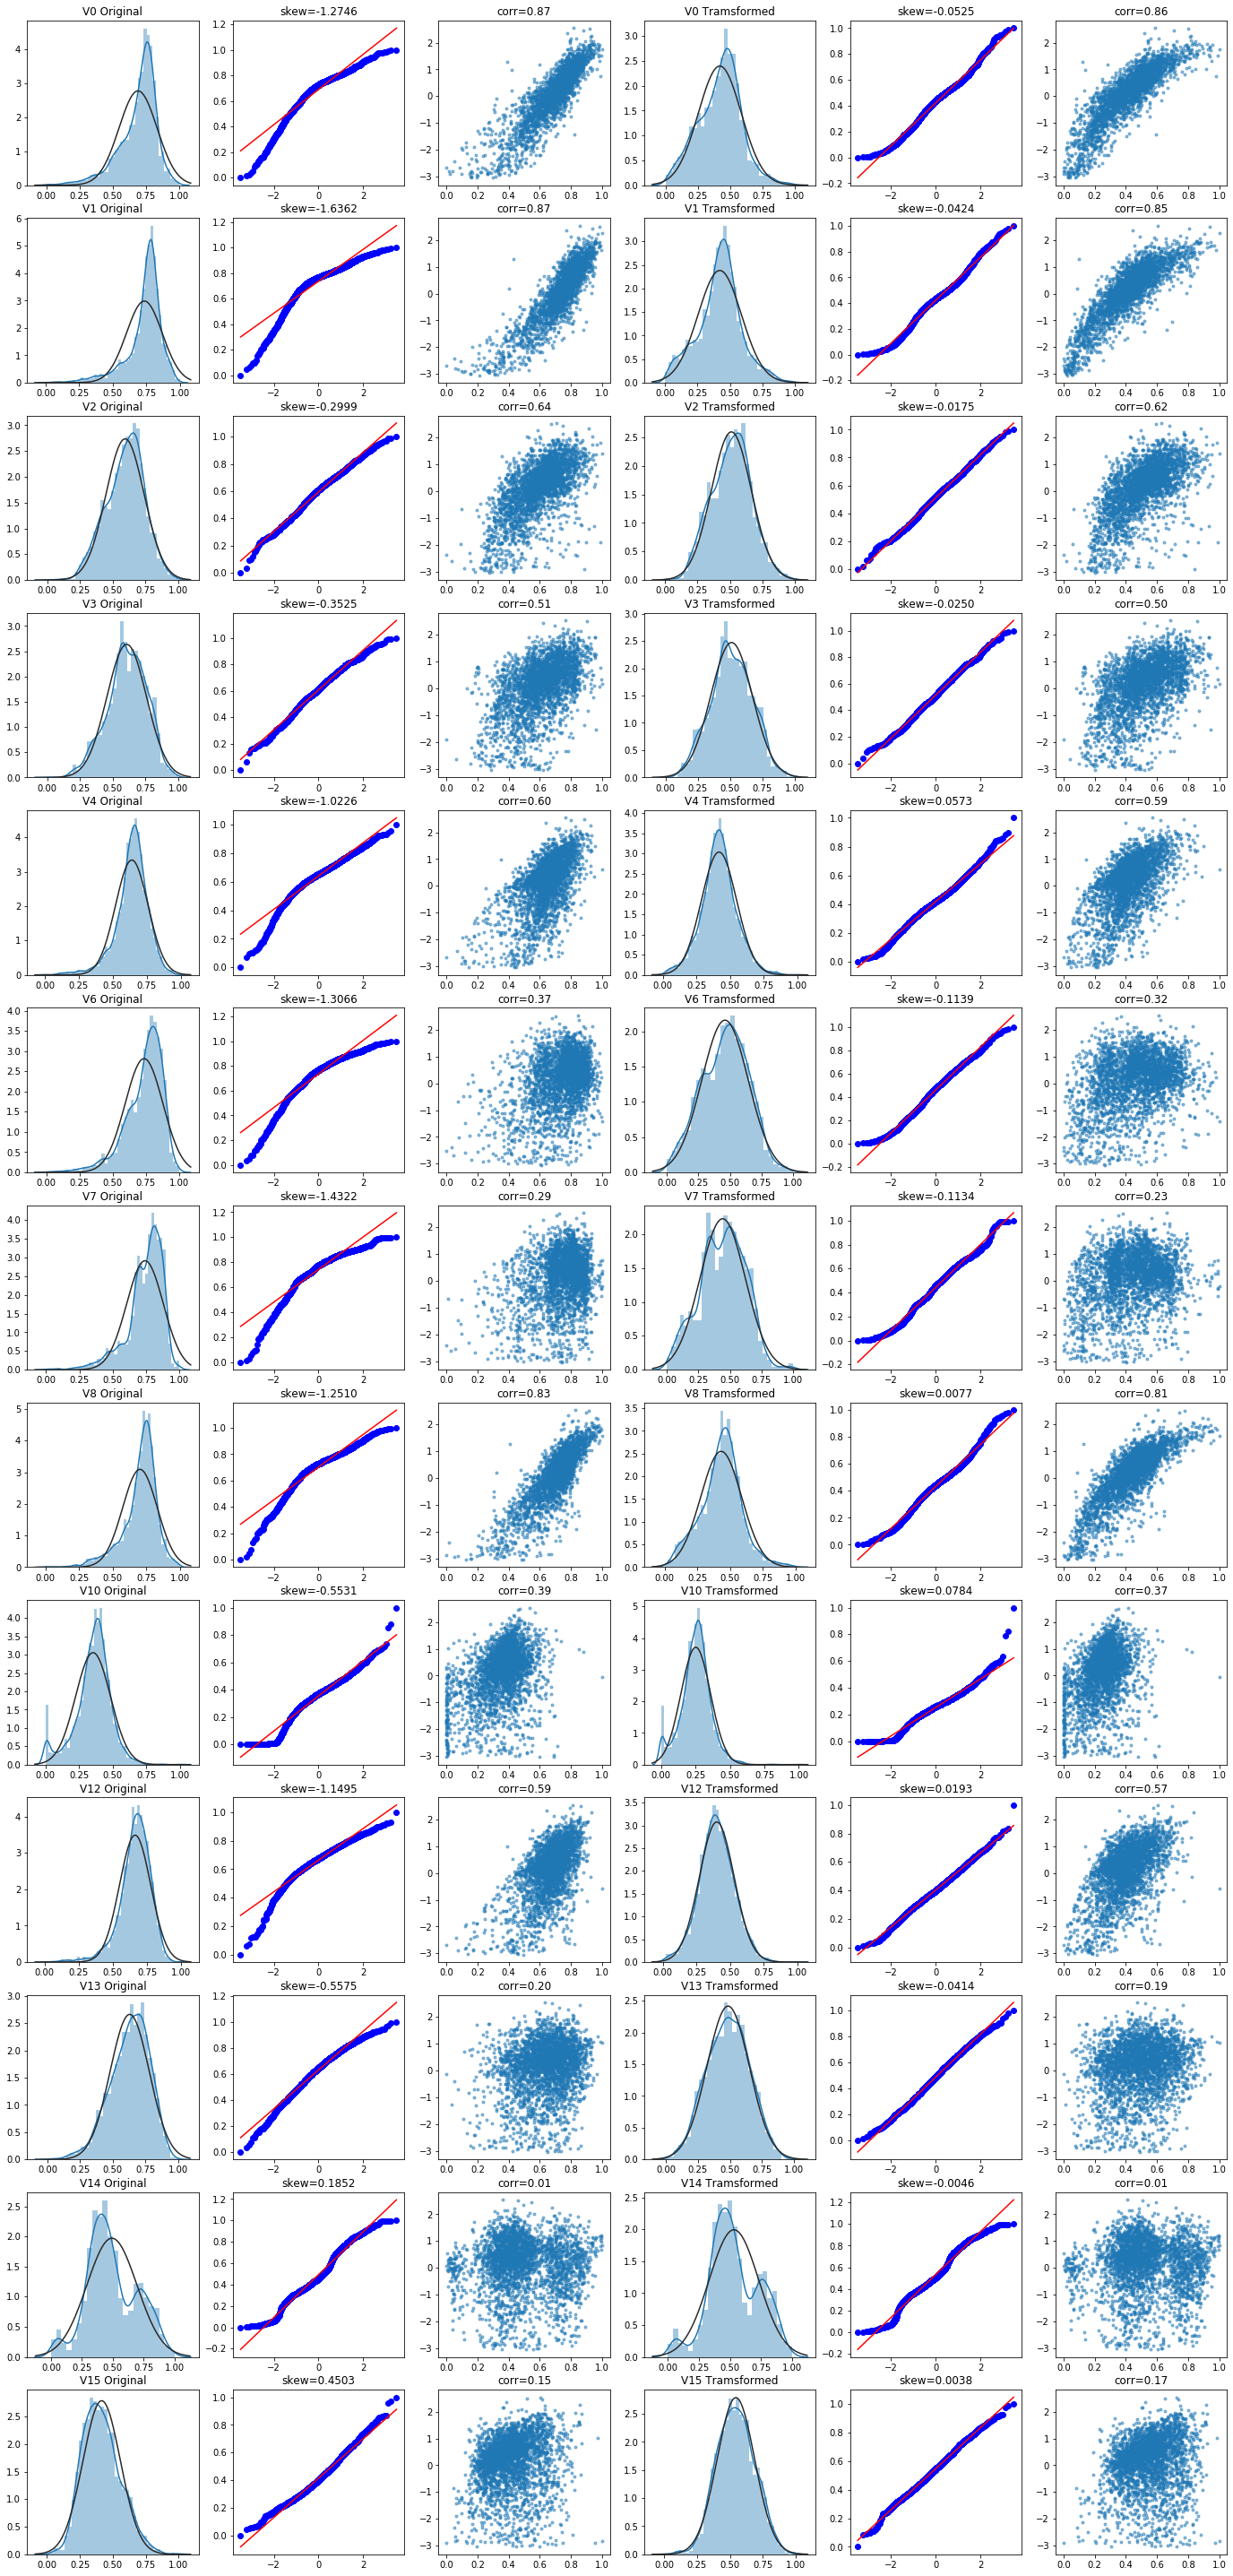

In [66]:
## Check effect of Box-Cox transforms on distributions of continuous variables

train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

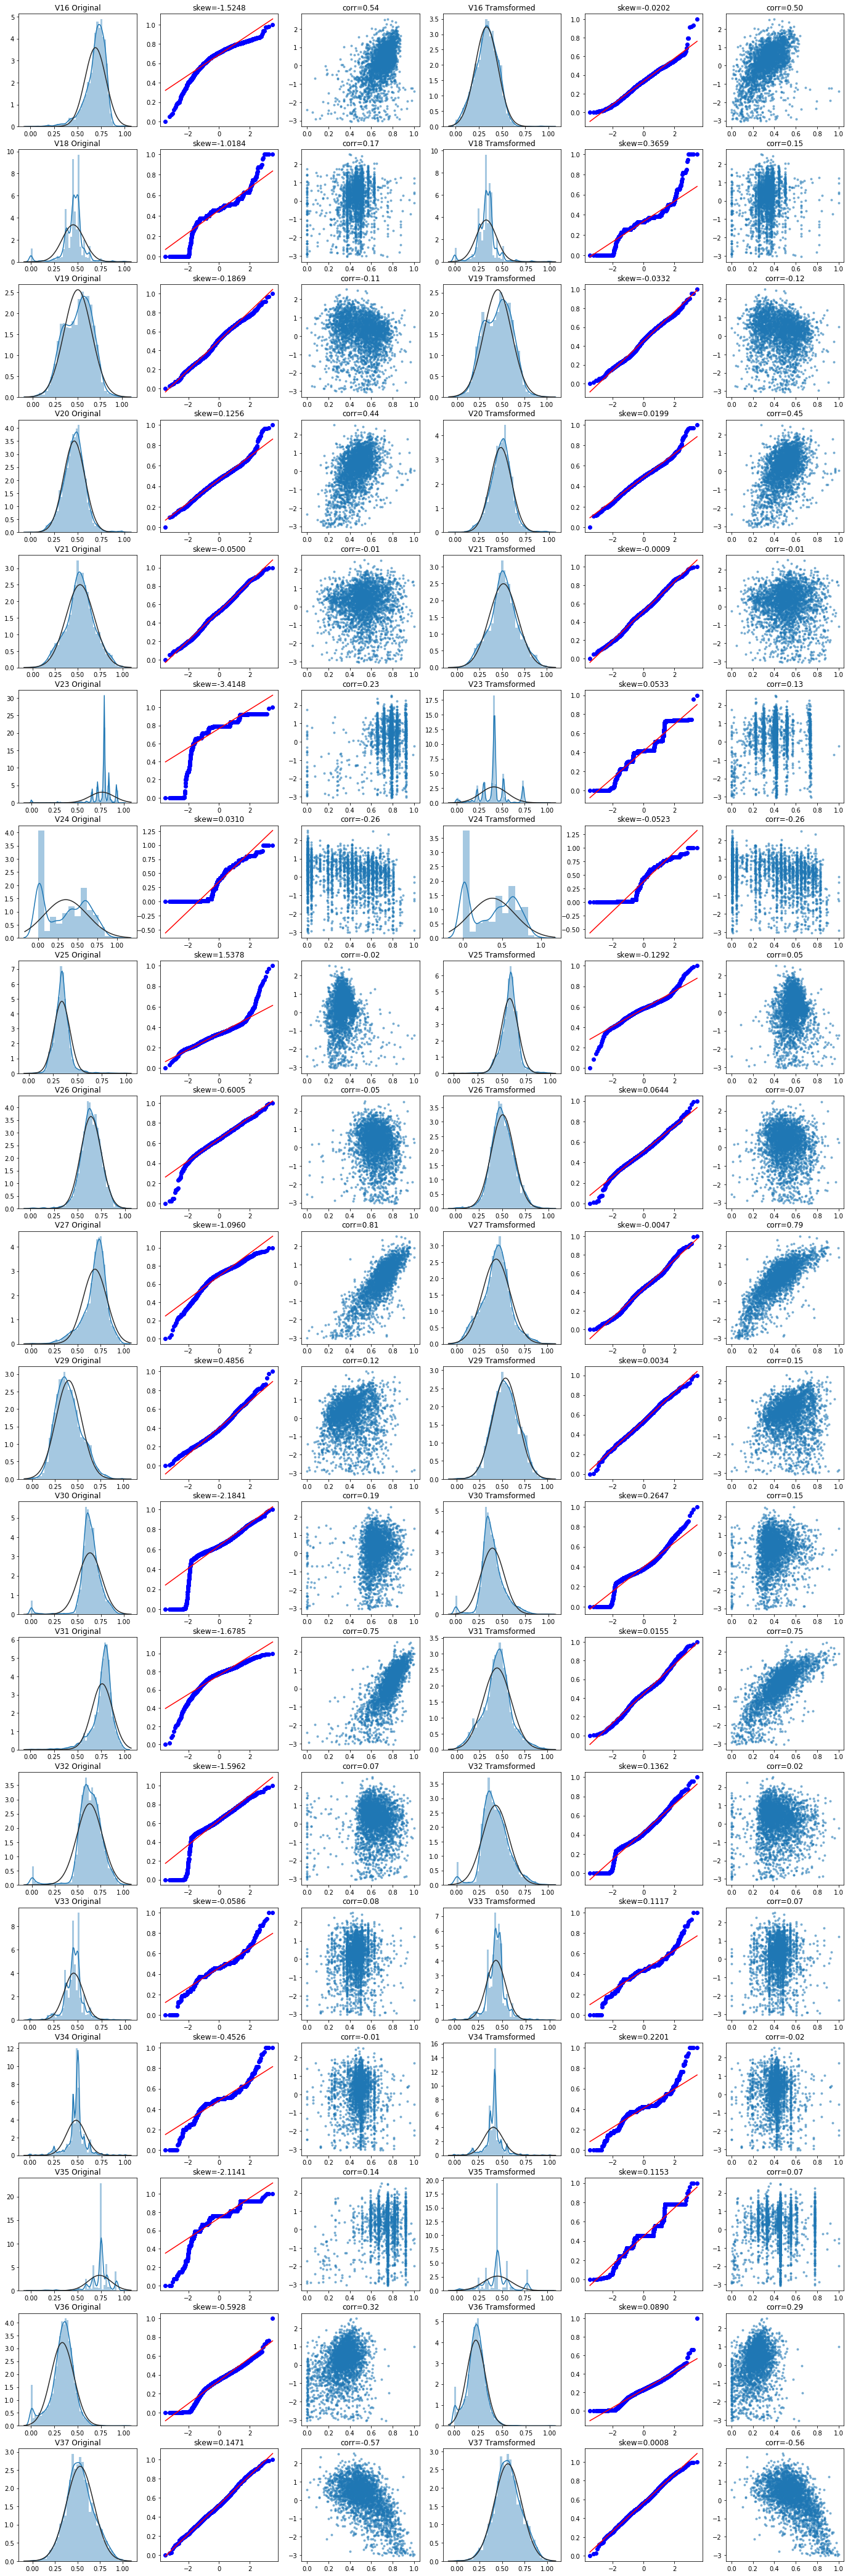

In [67]:
## Check effect of Box-Cox transforms on distributions of continuous variables


fcols = 6
frows = len(cols_numeric_right)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_right:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))